## 탐색적 데이터 분석

### 데이터 둘러보기

In [1]:
import pandas as pd

# 데이터 경로
data_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

In [2]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [3]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

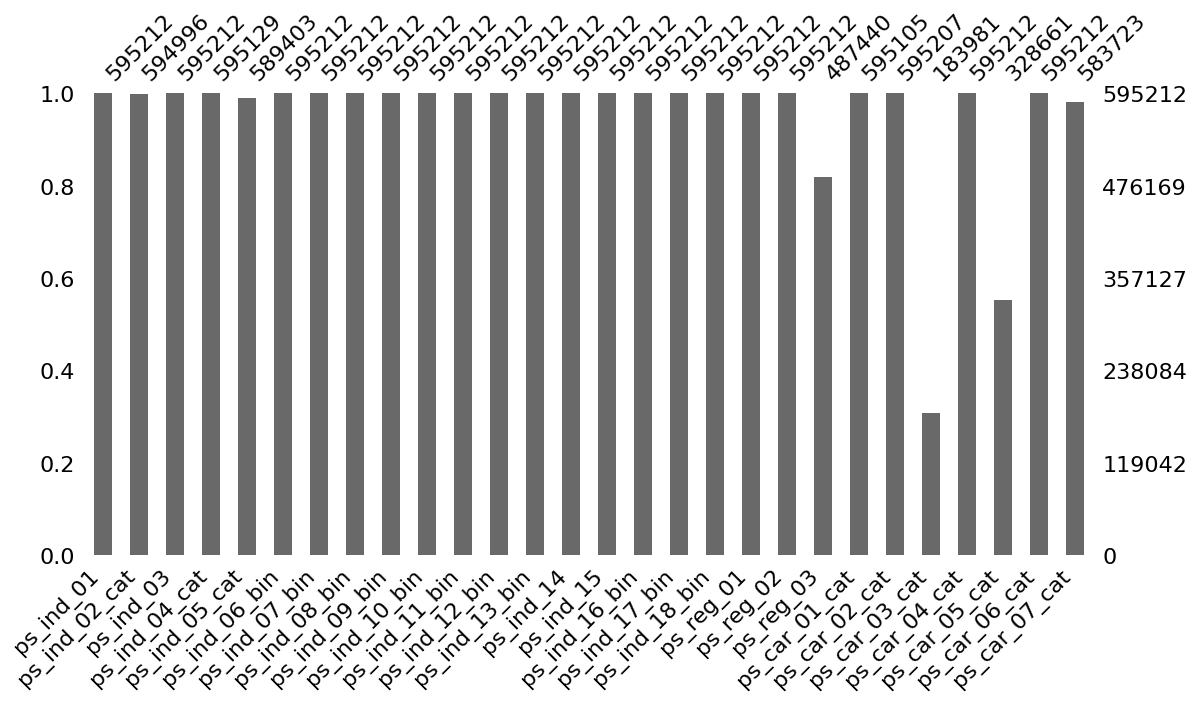

In [6]:
import numpy as np
import missingno as msno # 결측값을 시각화하는 패키지

# 훈련 데이터 복사분에서 -1을 np.NaN로 변환
train_copy = train.copy().replace(-1, np.NaN)

# 결측값 시각화(처음 28개만)
msno.bar(df=train_copy.iloc[:, 1:29], figsize=(13,6));

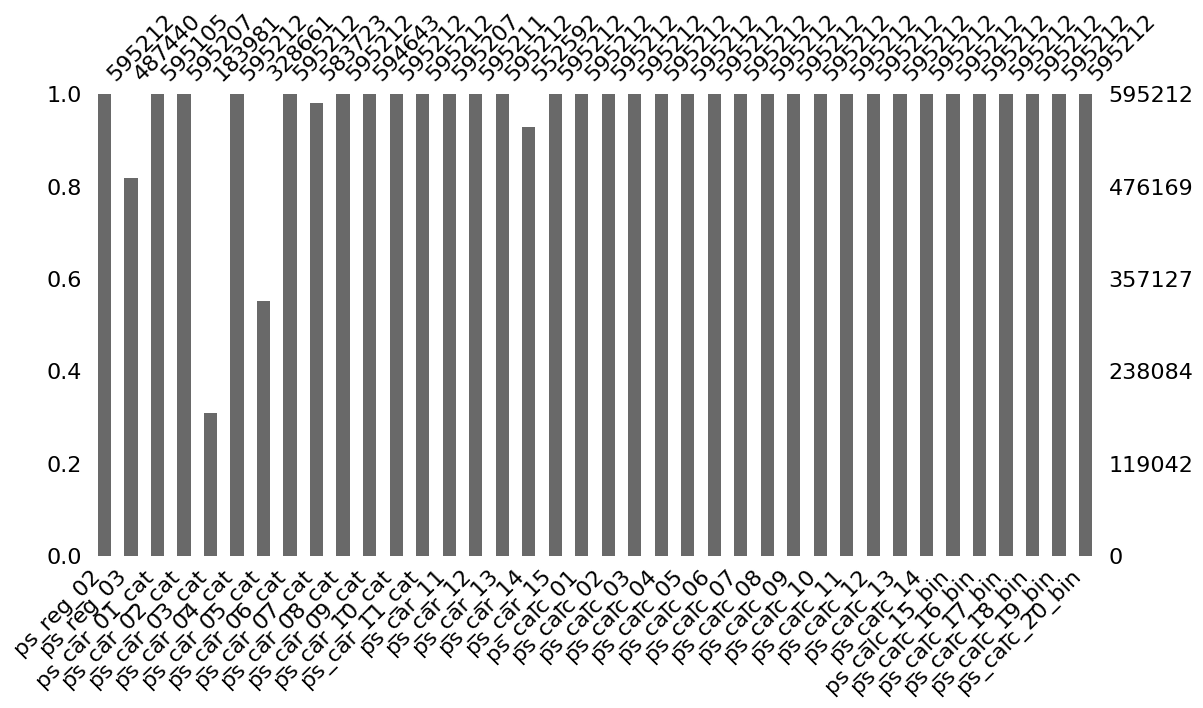

In [7]:
msno.bar(df=train_copy.iloc[:,20:], figsize=(13,6));

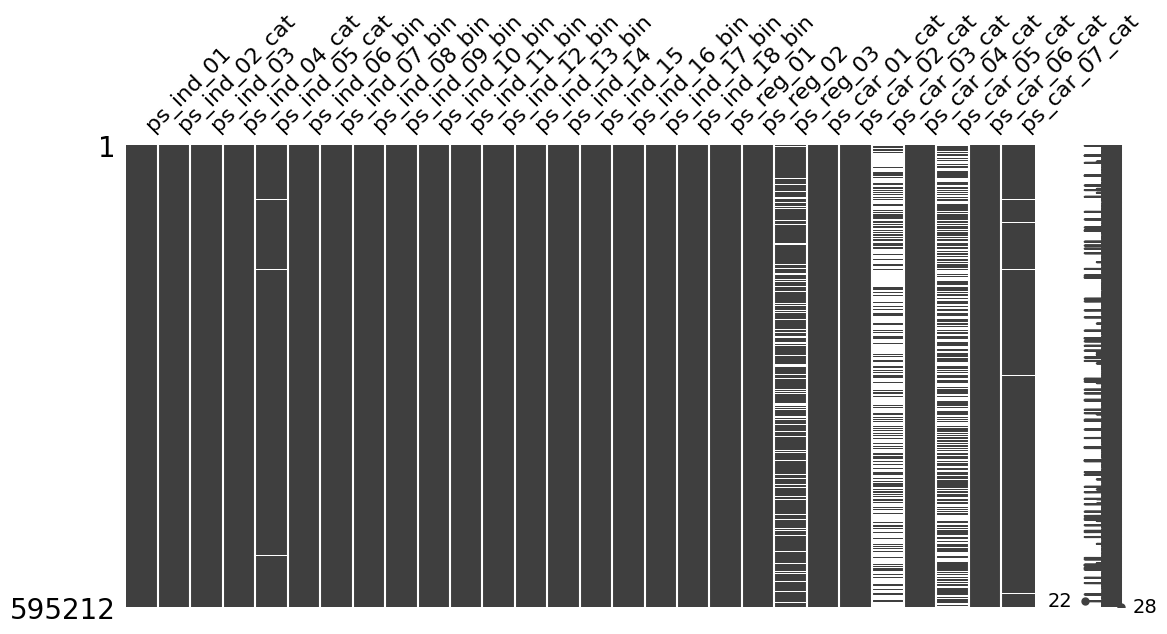

In [8]:
msno.matrix(df=train_copy.iloc[:, 1:29], figsize=(13,6));

#### 피처 요약표

In [9]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1rotn
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns: # (2)
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'
            
    return summary

- 결측값이 -1이므로 결측값 개수를 구하려면 -1의 개수를 구해야한다.
- (1) 처럼 (df==-1).sum().values 코드로 피처별 -1 갯수를 구할 수 잇다.
- (2) 에서는 for문을 순회하며 데이터 종류를 추가했다. 피처명에 'bin'이 포함돼 있거나 타깃 열이면 이진형 데이터이고 'cat'이 포함돼 있으면 명목형이다.
- 데이터 타입이float면 연속형 데이터이며, int면 순서형 데이터

In [10]:
summary = resumetable(train)
summary

데이터셋 형상 : (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


- 인덱스는 피처명이다. 데이터 타입 열에는 해당 피처의 데이터 타입이 기재돼 있다. 결측값 개수와 교윳값 개수도 한눈에 볼 수 있다.

In [11]:
summary[summary['데이터 종류'] == '명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [12]:
summary[summary['데이터 타입'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

### 데이터 시각화
- 데이터 시각화를 통해 모델링에 필요한 피처는 무엇이고, 필요없는 피처는 무엇인지 선별해보겠다.
- 먼저 타깃값 분포를 활용해 타깃값이 얼마나 불균형한지 알아보겠다. 더불어 이진 피처, 명목형 피처, 순서형 피처의 고윳값별 타깃값 비율을 알아보겠다.
- 시각화를 해보면 어떤 피처를 제거해야할지 알게 된다.

In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### 타깃값 분포

Text(0.5, 1.0, 'Target Distribution')

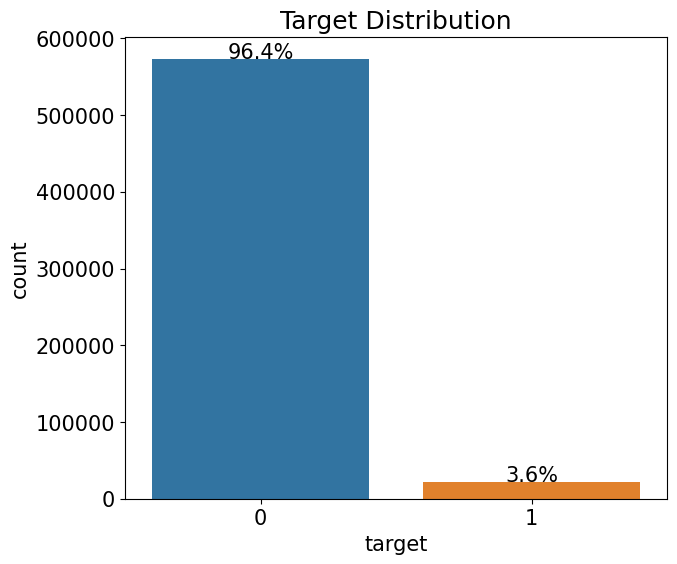

In [14]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 그래프 상단에 타깃값 배율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y)좌표에 텍스트 입력
        ax.text(left_coord + width/2.0, # x축 위치
                height + total_size* 0.001, # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha='center' # 가운데 정렬
               )
        
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution')

- 타깃값 0은 96.4%를 차지하며 1은 단 3.6%만 차지한다. 전체 운전자 중 3.6%만 보험금을 청구했다는 뜻이다.
- 차 사고가 그리 흔하게 나진 않는다. 그래서 소수의 운전자만 보험금을 청구했다.
- 타깃값이 불균형하기 때문에 비율이 작은 타깃값 1을 잘 예측하는게 중요하다. 따라서 이번에는 각 피처의 분포를 알아보기 보다는, 각 피처의 고윳값별 타깃값 1비율을 알아보겠다. 고윳값별 타깃값 1비율을 통해 해당 피처가 모델링에 필요한 피처인지 확인할 수 있다.


- 예컨대 피처 A에 고윳값 a,b가 있다고 하자. 이때 고윳값 a,b별로 타깃값 1비율이 얼마나 되는지 살펴보려는 거다. 고윳값별로 타깃값 1비율로 똑같거나 통계적 유효성이 떨어지면, 즉 통계적으로 유의미한 차이가 없다면 피처 A로는 무언가를 분별하기 어려우므로 예측에 도움이 되지 않는다. 다시 말해 고윳값에 따라 타깃값 비율이 달라야 그 피처가 타깃값 예측에 도움을 준다.


- 타깃값 1 비율의 통계적 유효성이 떨어져도 불필요한 피처가 될 수 있다. 통계적 유효성은 barplot()을 그릴 때 나타나는 신뢰구간으로 판단한다. 신뢰구간이 좁다면 통계적으로 어느 정도 유효하다고 보고, 구간이 넓다면 신뢰하기 어렵다고 보는 것이다. 


- 종합하자면 고윳값별 타깃값 1비율이 충분히 차이가 나고 신뢰구간도 작은 피처여야 모델링에 도움이 된다. 그렇지 않은 피처는 제거하는 게 좋다.

#### 이진 피처
- 이상의 내용에 유념해 이진 피처의 고윳값별 타깃값 비율을 구해보겠다.

In [15]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, size=(12,18)):
    mpl.rc('font', size=9)
    plt.figure(figsize=size) # 전체 Figure 크기 설정
    grid=gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ac축에 고윳갑별 타깃값 1비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)

- 이함수를 이용해 그래프를 그려보자 주어진 데이터 중 이진 피처는 18개이다. 그려야할 그래프가 많아 서브플롯을 3열로 배치했다.

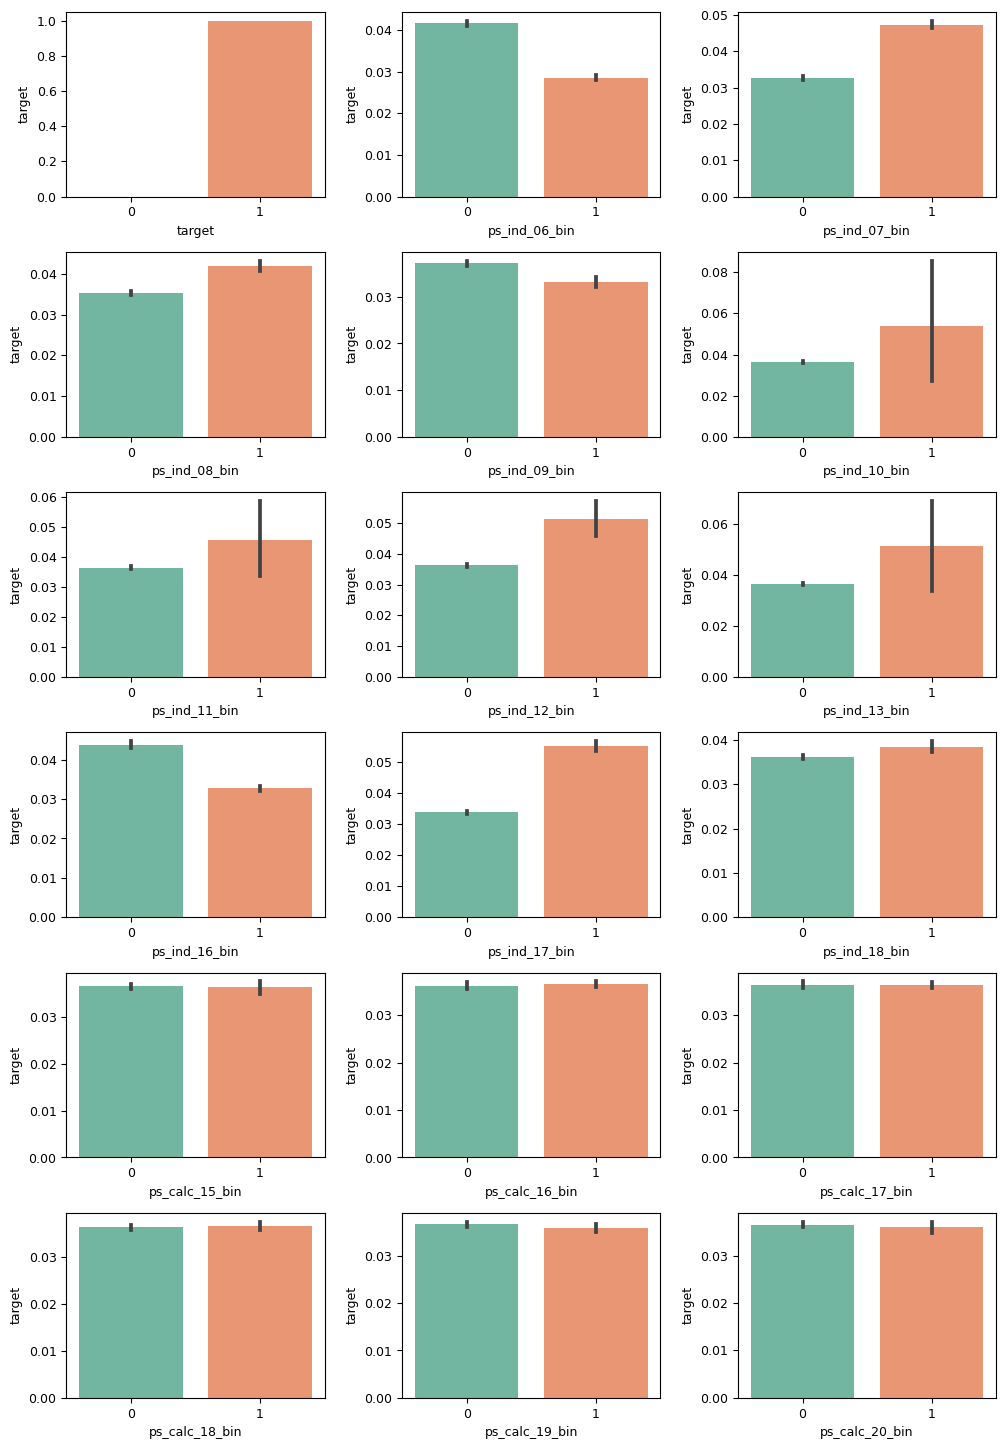

In [16]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index # 이진피처
# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train, bin_features, 6, 3) # 6행 3열 배치

- ps_ind_10_bin~ps_ind_13_bin은 신뢰구간이 넓어 통계적 유효성이 떨어짐
- ps_calc_15_bin~ps_calc_20_bin은 고윳값별 타깃값 비율 차이가 없어 타깃값 예측력이 없음
- 즉 위의 피처명 부분은 모델링 시 제거해야할 피처이다.
- 그리고 추가적으로 calc 분류의 이진 피처는 모두 타깃값 비율에 차이가 없다 calc 분류의 다른 피처도 차이가 없는지 추후 알아보도록 하자

#### 명목형 피처


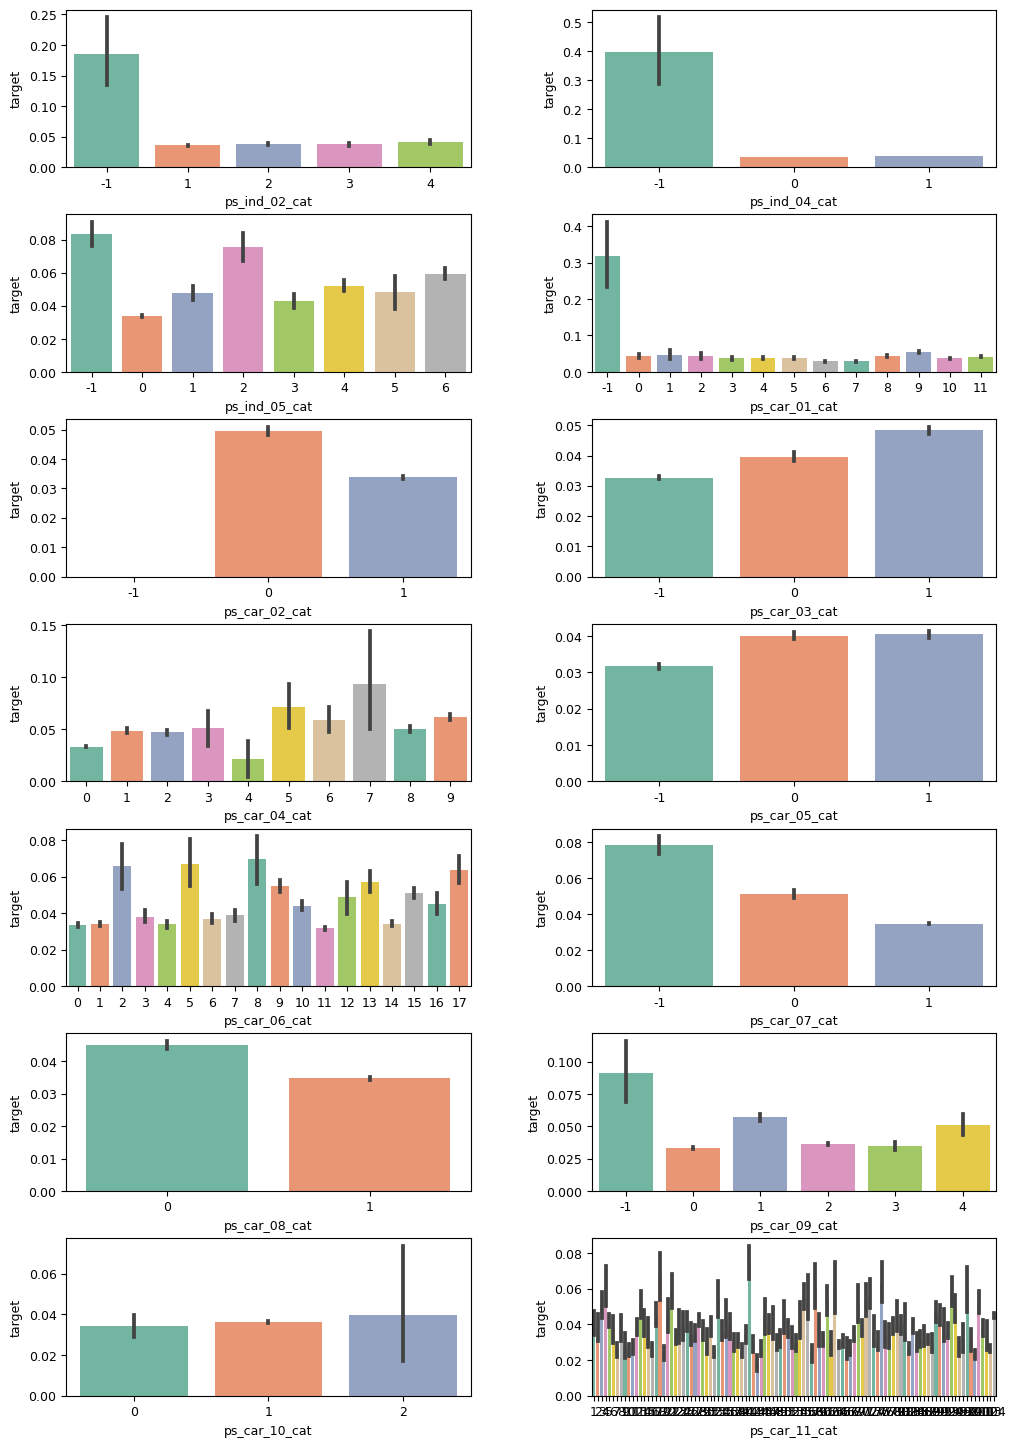

In [17]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index # 명목형 피처
plot_target_ratio_by_features(train, nom_features, 7 ,2 )

- 이번에는 -1 값을 포함한 피처도 많은 것을 확인하 수 있다. -1은 결측값이다. 보통 결측값은 적절히 처리한다.
- 예컨대 결측값이 많지 않다면 다른 값으로 대체하고, 결측값이 많다면 해당 피처 자체를제거한다. 하지만 결측값 자체가 타깃값 예측에 도움을 주는 경우도 있다.
- (1)번의 그래프 ps_ind_02_cat 피처를 보자 결측값 -1이 다른 고윳값들보다 타깃갑 1배율이 크다. 신뢰구간이 넓다는 점을 감안해도 비율이 확실히 크다. 이런 상황에서 결측값을 다른 값으로 대체하면 모델 성능이 나빠질 수 있다. 결측갑 자체가 타깃값에 대한 예측력이 있기 때문이다. 따라서 결측값을 그대로 두고 모델링하겠다. -1도 하나의 고윳값이라고 간주하는 것이다.


- (1)번 그래프의 ps_ind_02_cat 피처를 볼까?결측값 -1이 다른 고윳값들보다 타깃값 1비율이 크다. 신뢰구간이 넓다는 점을 감안해도 비율이 확실히 크다. 이런 상황에서 결측값을 다른 값으로 대체하면 모델 성능이 더 나빠질 수 있다. 결측값 자체가 타깃값에 대한 예측력이 있기 때문이다. 따라서 결측값을 그대로 두고 모델링하겠다. -1도 하나의 고윳값이라고 간주하는 것이다.


- 이번에는 (4)번의 ps_car_02_car 피처를 보자 -1일때 타깃값 1비율은 0%이다. 이 경우만 놓고 볼 때 ps_car_02_cat 피처 값이 -1이면 타깃값이 0이라고 판단해도 된다. 역시 결측값이 타깃값을 예측하는 데 도움을 준다. 결측값을 포함하는 다른 피처도 비슷한 양상을 보인다.


- (1) 번 (2)번 (3)번 그래프를 보자 -1을 제외하고 나머지 고윳값은 타깃값 1비율이 비슷하며 01일때 신뢰구간이 상대적으로 넓다. 그렇더라도 -1의 신뢰하한과 다른 고윳값들의 신뢰상한 간 차이가 크다. 따라서 -1의 신뢰구간이 넓다는 점을 감안해더 -1과 다른 고윳값들 간 타깃값 1비율에 차이가 있다. 즉, 고윳값 간 타깃값 1비율에 차이가 있으므로 모델링에 필요한 피처이다.


- 이런 이유로 ps_ind_02_cat, ps_ind_04_cat, ps_car_01_cat 피처는 신뢰구간이 넓더라도 제거하지 않겠다. 


- 마지막 (5)번에 있는 ps_car_10_cat피처를 보자 세 고윳값은 타깃값 1의 평균 비율이 비슷하다. 그리고 고윳값 2의 신뢰구간이 유독 넓다. 이 피처를 제거해야할까? 애매하다. 실제 상위권 캐글러 중 ps_car_10_cat 피처를 제거한 사람도 있고, 그대로 둔 사람도 있다. 이럴 때는 해당 피처를 제거한 경우와 제거하지 않은 경우 성능이 어떻게 다른지 비교해보는것도 좋은 방법이다. 실제로는 제거하지 않은 경우에 성능이 더 좋았다. 

#### 순서형 피처

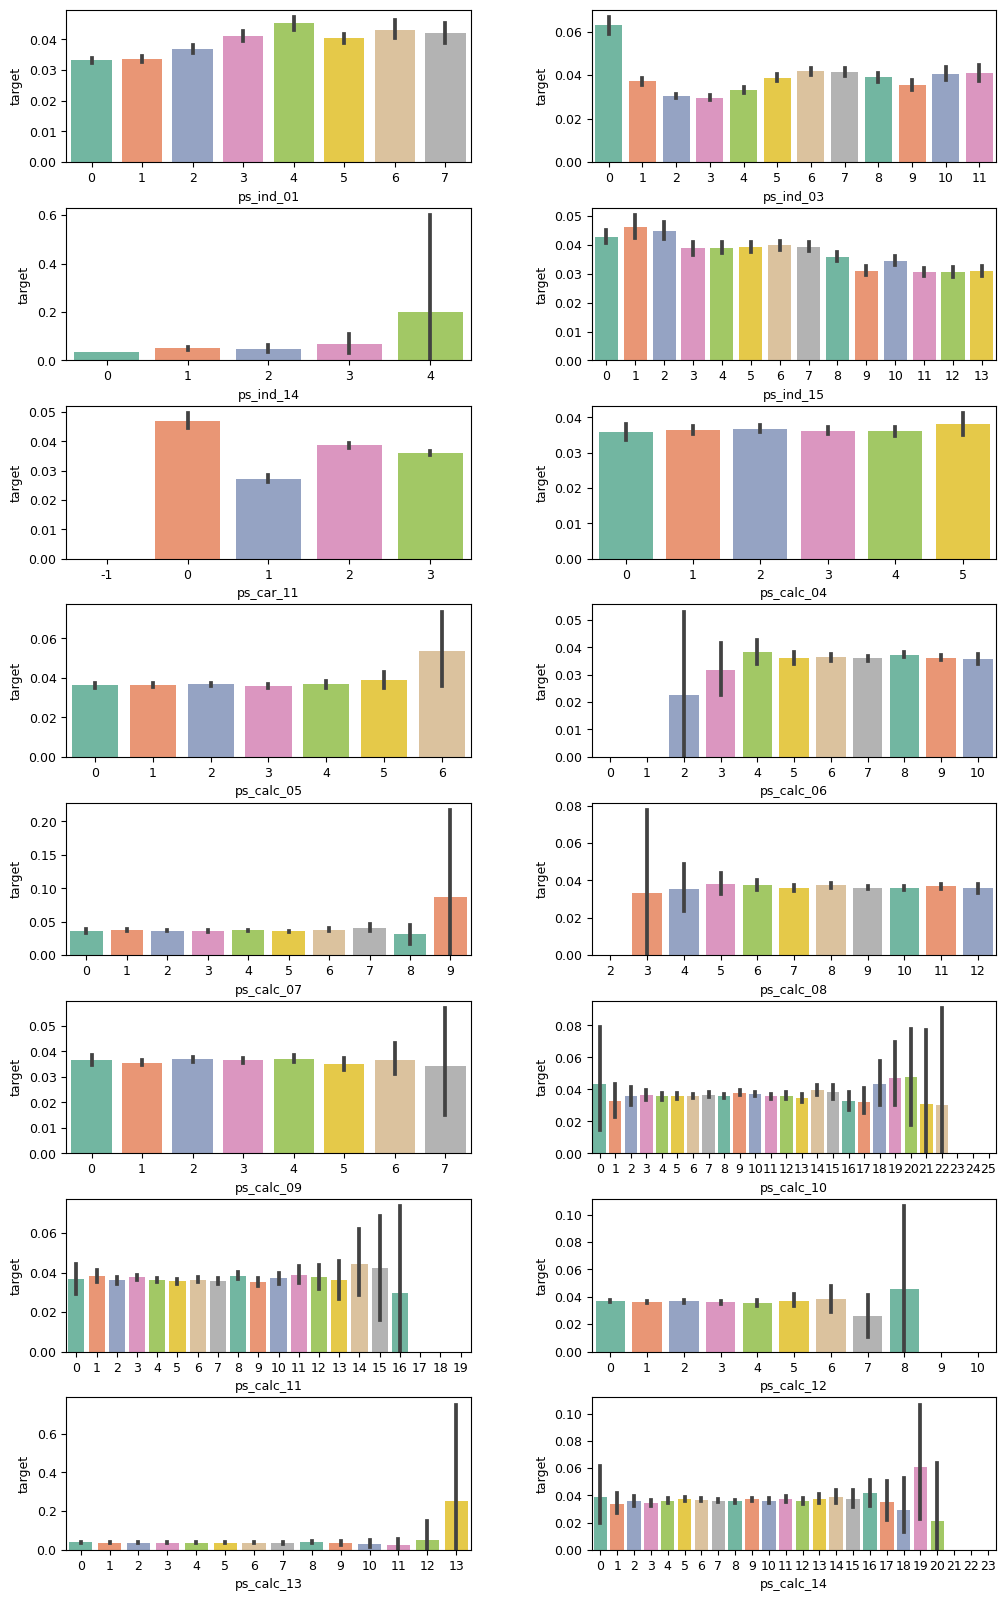

In [18]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index 

plot_target_ratio_by_features(train, ord_features, 8, 2, (12,20))

- ps_ind_14는 타깃값 비율의 신뢰구간이 넓어 통계적 유효성이 떨어진다.
- ps_calc_04~ps_calc_14는 고윳값별 타깃값 비율 차이가 없다. 타깃값 비율이 다르더라도 신뢰구간이 넓어 통계적 유효성이 떨어진다.
- 그렇기에 제거해야할 것이다.

#### 연속형 피처
- 연속된 값이므로 고윳값이 굉장히 많다. 고윳값 타깃값 1비율을 구하기가 힘들다. 그렇기 때문에 값을 몇 개의 구간으로 나눠서 구간별 타깃값 1 비율을 알아보도록 하겠다.
- 연속형 데이터를 구간으로 나누려면 판다스의 cut() 함수를 활용하면 된다. 다음은 cut() 함수를 활용해 여러 개의 값을 3개 구간으로 나누는 예이다. 함수의 첫번째 인수 값들의 리스트이며, 두번째 인수가 나눌 구간의 갯수이다.

In [19]:
pd.cut([1.0,1.5,2.1,2.7,3.5,4.0],3)

[(0.997, 2.0], (0.997, 2.0], (2.0, 3.0], (2.0, 3.0], (3.0, 4.0], (3.0, 4.0]]
Categories (3, interval[float64, right]): [(0.997, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

- 이 방법은 연속형 데이터를 범주형 데이터로 바꾸는효과가 있다. 
- 이 방법을 활용해 연속형 피처의 구간별 타깃값 1비율을 구해보겠다. 그래프를 그리는 코드는 앞서 정의한 plot_target_ratio_by_features()함수의 코드와 유사한ㄷ. cut()함수로 구간을 나누는 부분만 다를 뿐이다.

In [35]:
# cont_features = summary[summary['데이터 종류'] == '연속형'].index # 연속형 피처
# cont_features
# plt.figure(figsize=(12,16)) # Figure 크기 설정
# grid = gridspec.GridSpec(5,2) # GridSpec 객체 생성
# plt.subplots_adjust(wspace=0.2, hspace=0.4) # 서브플롯 간 여백 설정

# for idx, cont_feature in enumerate(cont_features):
#     # 값을 5개 구간으로 나누기
#     train[cont_feature] = pd.cut(train[cont_feature], 5)
    
#     ax = plt.subplot(grid[idx]) # 분포도를 그릴 서브플롯 설정
#     sns.barplot(x=cont_feature, y='target', data=train, palette='Set2', ax=ax)
#     ax.tick_params(axis='x', labelrotation=10) # x축 라벨 회전

#### 연속형 피처2

In [36]:
train_copy = train_copy.dropna() 

In [38]:
# plt.figure(figsize=(10,8))
# cont_coor = train_copy[cont_features].corr()
# sns.heatmap(cont_corr, annot=True, cmap='0rRd')

## 베이스라인 모델

In [39]:
import pandas as pd

data_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

### 피처 엔지니어링

#### 데이터 합치기
- 먼저 훈련 데이터와 테스트 데이터를 합친다. 뒤이어서 두 데이터에 동일한 인코딩을 적용하기 위해서이다.
- 인코딩은 타깃값이 아닌 피처에만 적용해야 하므로 합친 데이터에서 타깃값은 제거하겠다.

In [40]:
all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

In [41]:
all_features = all_data.columns
all_features

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

#### 명목형 피처 원-핫 인코딩
- 모든 명목형 피처에 원-핫 인코딩을 적용하려고 한다. 명목형 데이터에는 고윳값별 순서가 따로 없기 때문이다. 이름에 'cat'이 포함된 피처가 명목형 피처이다. 지능형 리스트를 활용해 명목형 피처를 추출한 다음 인코딩하겠다.

In [42]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder() #원-핫인코더 객체 생성

encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

#### 필요 없는 피처 제거

In [43]:
drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

# 명목평 피처, calc 분류의 피처, 추가 제러할 피처를 제외한 피처
remaining_features = [feature for feature in all_features
                     if('cat') not in feature and
                     'calc' not in feature and
                     feature not in drop_features]

In [44]:
remaining_features

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_15']

In [45]:
from scipy import sparse

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data[remaining_features]), encoded_cat_matrix], format='csr')

#### 데이터 나누기

In [46]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values

### 평가지표 계산 함수 작성

- 본 경진대회의 평가지표는 정규화된 지니계수인데, 이 지표는 파이썬이나 사이킷런에서 기본으로 제공하지 않는다. 그래서 정규화 지니계수를 구하는 사용자 정의 함수를 직접 만들어야 한다. 이번절에서는 지니 계수에 대해 알아본 뒤 정규화 지니계수를 계산하는 함수를 만들어 보겠다.


#### 지니계수란
- 지니계수는 원래 경제학에서 쓰는 용어이다. 경제학에서 지니계수로 소득 불평등 정도를 타나내는 지표이다. 지니계수가 작을수록 소득 수준이 평등하고 클수록 불평등함을 의미한다.
- 지니계수는 로렌츠 곡선을 이용해 계산한다. 로렌츠 곡선을 그리려면 모든 경제인구를 소득순서대로 나열한 후 가로축은 인구 누적 비율, 세로축은 소득 누적 점유율로 설정한다. 인구 누적 비율과 해당 소득 누적 점유율을 연결한 선을 로렌츠 곡선이라고 한다.
 

#### 정규화 지니계수 계산 함수
- 정규화란 값의 범위를 0~1사이로 조정한다는 뜻이다. 정규화 지니계수는 값이 0에 가까울수록 성능이 나쁘고, 1에 가까울수록 성능이 좋다는 의미가 도니다.
- 지금 맥락에서 정규화 지니계수는 '예측값에 대한 지니계수' 예측이 완벽할 때의 지니계수'로 나눈값이다 
- 정규화 지니계수 = 예측값에 대한 지니계수/예측이 완벽할때의 지니계수
- 예측값에 대한 지니계수는 예측값과 실제값으로 구한 지니계수를 뜻한다. 그리고 예측이 완벽할 때의 지니계수는 실젯값과 실젯값으로 구한 지니계수를 뜻한다. 예측이 완벽하더라도 말은 예측값이 실제값과 같다는 의미이기 때문이다. 
- 우리는 이를 넘파이 내장 함수를 이용해 구현해보겠다. 실제 타깃값(y_true)과 예측 확률값 (y_pred)을 입력받아 정규화 지니계수를 반환하도록 했다.

In [47]:
import numpy as np

def eval_gini(y_true, y_pred):
    # 실젯값과 예측값의 크기가 서로 같은지 확인(값이 다르면 오류 발생)
    assert y_true.shape == y_pred.shape
    
    n_samples = y_true.shape[0] # 데이터 개수
    L_mid = np.linspace(1/n_samples, 1, n_samples) # 대각선 값
    
    # 1) 예측값에 대한 지니계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기순으로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # 로렌트 곡선
    G_pred = np.sum(L_mid - L_pred) # 예측값에 대한 지니계수
    
    # 예측이 완벽할때 지니계수
    true_order = y_true[y_true.argsort()] # y_true 크기순으로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # 로렌츠 곡선
    G_true = np.sum(L_mid - L_true) # 예측이 완벽할 때 지니계수
    
    # 정규화된 지니계수
    return G_pred / G_true


In [49]:
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True # 평가지표 이름, 평가 점수, 평가 점수가 높을수록 좋은지 여부

###  모델 훈련 및 성능 검증
#### OOF 예측 방식
- OOF예측(Out of Fold prediction)이란 K폴드 교차 검증을 수행하면서 각 폴드마다 테스트 데이터로 예측하는 방식이다. 조금 더 자세히 보면, K 폴드 교차 검증을 하면서 폴드마다 훈련데이터로 모델을 훈련하고 검증데이터로 모델 성능을 측정하며 테스트 데이터로 최종 타깃 확률도 예측한다. 훈련된 모델로 마짐가에 한 번만 예측하는게 아니다. 각 폴드별 모델로 여러번 예측해 평균을 내는 방식이다.


- 전체 훈련 데이터를 k개 그룹으로 나눈다.
- k개 그룹 중 한 그룹은 검증 데이터, 나머지 k-1개 그룹은 훈련 데이터로 지정한다.
- 훈련 데이터로 모델을 훈련한다.
- 훈련된 모델을 이용해 검증 데이터로 타깃 확률을 예측하고, 전체 테스트 데이터로도 타깃 확률을 예측한다.
- 검증 데이터로 구한 예측 확률과 테스트 데이터로 구한 예측 확률을 기록한다.
- 검증 데이터를 다른 그룹으로 바꿔가며 2~5번 절차를 총 k번 반복한다.
- k개 그룹의 검증 데이터로 예측한 확률을 훈련 데이터 실제 타깃값과 비교해 성능 평가점수를 계산한다. 이 점수로 모델 성능을 가늠해볼 수 있다.
- 테스트 데이터로 구한 k개 예측 확률의 평균을 규한다. 이 값이 최종 예측 확률이며, 제출해야하는값이다.

#### OOF 방식으로 LightGBM 훈련
- 지금까지 OOF 예측 방식이 무엇인지 알아보겠다. 이제 베이스라인 모델을 훈련하면서 OOF 예측도 실제로 해보겠다. 베이스라인 모델로는 LightGBM을 사용한다.
- 먼저 층화 K 폴드 교차 검증기를생성한다. 본 경진대회의 타깃값은 불균형하다. 따라서 K폴드가 아니라 층화 K 폴드를 수행하는게 바람직하다. 층화 K폴드는 타깃값이 균등하게 배치되게 폴드를 나누는 방식이기 때문이다

In [50]:
from sklearn.model_selection import StratifiedKFold

#층화 K폴드 교차 검증기
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1001) # 시계열 데이터가 아니라면 섞어 주는 게 좋다.

In [51]:
folds

StratifiedKFold(n_splits=5, random_state=1001, shuffle=True)

In [53]:
params = {'objective':'binary', 
          'learning_rate':0.01,
         'force_row_wise':True, # 경고 문구 없애기 위해
          'random_state':0}

In [56]:
# OOF 방식으로 훈련도니 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# OOF 방식으로 훈련도니 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차우너 뱅려
oof_test_preds = np.zeros(X_test.shape[0])

- oof_val_preds는 검증 데이터를 활용해 예측한 확률값을 저장하는 배열이다. K폴드로 나눠도 훈련 데이터 전체가 결국엔 한 번씩 검증 데이터로 활용된다. 따라서 oof_val_preds배열 크기는 훈련 데이터와 같아야 한다. 훈련 데이터 개수는 X.shape[0]으로 구한다.

- oof_test_preds는 테스트 데이터를 활용해 예측한 확률값을 저장하는 배열이다. 최종 제출에 사용할 값이므로 크기는 테스트 데이터와 같아야 한다. 테스트 데이터 개수는 X_test.shape[0]로 구한다.
- 둘 다 추기 배열이므로 값은 0으로 채웠다. np.zeros()는 넘파이 내장 함수로, 지정 개수만큼 0으로 채운 배열을 반환한다.

In [57]:
oof_val_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [58]:
folds.split(X, y)

<generator object _BaseKFold.split at 0x7ad023351e70>

In [61]:
import lightgbm as lgb

# OOF 방식으로 모델 훈련, 검증, 예측
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)): # (1) 아마 전체갯수가 idx로 x,y로 나눈게 괄호안으로 들어가는듯
    # 각 폴드를 구분하는 문구 출력
    print('#'*40, f'폴드 {idx+1} / 폴드 {folds.n_splits}', '#'*40)
   
    # 훈련용 데이터, 검증용 데이터설정 (2)
    X_train, y_train = X[train_idx], y[train_idx] # 훈련용 데이터
    X_valid, y_valid = X[valid_idx], y[valid_idx] # 검증용 데이터
    
    # LightGBM 전용 데이터셋 생성 (3)
    dtrain = lgb.Dataset(X_train, y_train) # LightGBM 전용 훈련 데이터 셋
    dvalid = lgb.Dataset(X_valid, y_valid) # LightGBM 전용 검증 데이터 셋
    
    # LightGBM 모델 훈련 (4)
    lgb_model = lgb.train(params=params, # 훈련용 하이퍼파라미터
                         train_set=dtrain, # 훈련 데이터셋
                         num_boost_round=1000, # 부스팅 반복 횟수
                         valid_sets = dvalid, # 성능 평가용 검증 데이터셋
                         feval=gini, # 검증용 평가지표
                         early_stopping_rounds=100, # 조기종료 조건
                         verbose_eval=100 # 100번째마다 점수 출력
                         )
    
    # 테스트 데이터를 활용해 OOF 예측 (5)
    oof_test_preds += lgb_model.predict(X_test)/folds.n_splits
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측 (6)
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    # 검증 데이터 예측 확률에 대한 정규화 지니계수 (7)
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'폴드 {idx+1} 지니계수:{gini_score}\n')
        

######################################## 폴드 1 / 폴드 5 ########################################


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1100
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.153252	valid_0's gini: 0.270945
[200]	valid_0's binary_logloss: 0.152329	valid_0's gini: 0.283198
[300]	valid_0's binary_logloss: 0.151942	valid_0's gini: 0.288508
[400]	valid_0's binary_logloss: 0.151753	valid_0's gini: 0.291107
[500]	valid_0's binary_logloss: 0.151673	valid_0's gini: 0.292756
[600]	valid_0's binary_logloss: 0.151636	valid_0's gini: 0.293336
[700]	valid_0's binary_logloss: 0.151616	valid_0's gini: 0.293869
[800]	valid_0's binary_logloss: 0.151626	valid_0's gini: 0.293546
Early stopping, best iteration is:
[716]	valid_0's binary_logloss: 0.151613

이 코드는 LightGBM을 사용하여 k-fold cross-validation 방식으로 데이터에 대한 모델을 훈련시키고, 각 fold에서의 성능을 검증하는 예제입니다. 각 부분에 대해 상세하게 설명드리겠습니다.

1. **for 문 (k-fold 시작)**:
   - 여기서 'folds.split(X, y)'는 전체 데이터셋을 훈련 세트와 검증 세트로 나누는 역할을 합니다. 이것은 주어진 k개의 fold로 나누어집니다. 'X'와 'y'는 각각 특성(feature) 데이터와 대상(target) 레이블을 나타냅니다.

2. **훈련용 데이터, 검증용 데이터 설정**:
   - 'train_idx'와 'valid_idx'는 각 fold에서 생성된 인덱스입니다. 이 인덱스를 사용하여 메인 데이터셋에서 훈련용 및 검증용 데이터를 분리합니다.

3. **LightGBM 전용 데이터셋 생성**:
   - LightGBM은 자체 데이터셋 형식을 사용합니다. 이 형식은 모델을 더 빠르고 효율적으로 훈련시키기 위해 최적화되어 있습니다. 여기서 'dtrain'과 'dvalid'는 각각 훈련용 및 검증용 데이터셋을 나타냅니다.

4. **LightGBM 모델 훈련**:
   - 이 단계에서는 LightGBM 모델을 훈련시킵니다. 여러 파라미터가 있으며, 이들 중 일부는 다음과 같습니다:
     - 'params': 모델의 하이퍼파라미터를 포함하는 딕셔너리.
     - 'num_boost_round': 부스팅 단계의 수(반복 횟수).
     - 'valid_sets': 모델의 성능을 평가하는 데 사용되는 검증 데이터셋.
     - 'feval': 사용자 정의 평가 함수. 이 경우 'gini' 함수를 사용하여 모델의 성능을 평가합니다.
     - 'early_stopping_rounds': 성능 향상이 멈추면 조기 종료를 위한 라운드 수.
     - 'verbose_eval': 지정된 단계마다 훈련 과정을 출력합니다.

5. **테스트 데이터를 활용한 OOF(Out-of-Fold) 예측**:
   - 모델이 훈련 데이터의 각 폴드에 대해 훈련되고 난 후, 테스트 데이터셋에 대한 예측을 수행합니다. 이 예측은 모든 폴드에 걸쳐 평균내어집니다(folds.n_splits로 나눔).

6. **모델 성능 평가를 위한 검증 데이터 타깃값 예측**:
   - 각 검증 폴드에 대해 예측을 수행하고, 이를 'oof_val_preds'에 저장합니다. 이는 나중에 각 폴드에서 모델의 성능을 평가하는 데 사용됩니다.

7. **검증 데이터 예측에 대한 정규화 지니 계수 계산**:
   - 'eval_gini' 함수를 사용하여 지니 계수를 계산합니다. 이것은 모델의 예측 성능을 평가하는 데 사용되는 메트릭입니다. 지니 계수는 불균형한 클래스 분포를 가진 데이터셋에 대한 모델 성능을 측정하는 데 특히 유용합니다.

이 프로세스는 선택한 fold 수에 따라 여러 번 반복되며, 각 반복에서 모델의 성능이 평가되고, 모든 폴드에 대한 평균 성능이 최종 모델 평가로 사용됩니다.

In [62]:
print('OOF 검증 데이터 지니계수:',eval_gini(y, oof_val_preds))

OOF 검증 데이터 지니계수: 0.2822384955173371


## 성능개선 : LightGBM 모델
- 베이스라인과 같은 모델을 사용하지만 피처 엔지니어링과 하이퍼파라미터 최적화를 추가로 적용할 것이다.

In [63]:
import pandas as pd

data_path = '/kaggle/input/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

all_data = pd.concat([train, test], ignore_index=True)
all_data = all_data.drop('target', axis=1)

from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

onehot_encoder = OneHotEncoder() #원-핫인코더 객체 생성

encoded_cat_matrix = onehot_encoder.fit_transform(all_data[cat_features])

encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

#### 파생 피처 
- 탐색적 데이터 분석 과정에서는 필요 없는 피처를 추리는 것 외에 특별한 피처 엔지니어링 건을 찾아내지 못햇다. 그렇다고 해서 할 수 있는 일이 더는 없다는 뜻은 절대 안디ㅏ. 이번 절에 서는 성능을 더 쥐어짜내기 위해서 시도해볼 수 있는 기법을 몇가지 소개하겟다.
- 한 데이터가 가진 결측값 개수를 파생 피처로 만들어 보겠다. -1이 결측값이었다. 따라서 결측값 개수를 구하려면 -1개수를 구하면 된다.

In [64]:
# 데이터 하나당 결측값 개수를 파생 피처로 추가
all_data['num_missing'] = (all_data==-1).sum(axis=1)

- 코드에서 보듯 결측값 개수를 num_missing이라는 피처명으로 all_data에 추가했다.
- remaining_features는 명목형 피처와 calc 분류의 피처를 제외한 나머지 피처명으로 정의하겠다.
- 명목형 피처는 바로 다음에 원-핫 인코딩을 해줄거라서 제외했고, calc 분류는 탐색적 데이터 분석에서 필요 없는 피처라는 사실을 알았기 때문에 제외했다. 
- 그리고 방금 생성한 파생 피처 num_missing도 remaining_features에 추가했다.

In [65]:
# 명목형 피처, calc 분류의 피처를 제외한 피처
remaining_features = [feature for feature in all_features
                     if ('cat' not in feature and 'calc' not in feature)]

# num_missing으르 remaining_features에 추가
remaining_features.append('num_missing')

In [66]:
remaining_features

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'num_missing']

- 이로써 all_data와 remaining_feature에 새로운 파생 피처 num_missing이 ㅊ가되었다.

- 두번째 ind 분류의 피처들을 살펴보겠다. 모든 ind 피처 값들을 연결해 새로운 피처를 만들려고 한다. 
- ind 자체는 뒤이어 추가할 명목형 피처의 고윳값별 개수 피처를 만들 때 사용하기 위한 임시 피처이다. 
- 바꿔 말해 mix_ind를 활용해 또 다른 새로운 피처를 만들려는 것이다. 
- 파생피처를 만드는 이유 : 파생피처들은 타깃값 예측에 어떤 도움이될까? 사실 처음부터 어떤 파생 피처가 타깃값 예측에 도움이 되는지 알기는 쉽지 않다. 사칙연산도 해보고, 통계도 내보고, 문자열 연결도 해보는 등 갖은 방법으로 피처엔지니어링을 해볼 수 있다. 실제로 많은 상위권 캐글러도 여러 피처 엔지니어링을 시도한다. 그중 성능 향상에 도움되는 피처를 별한다. 앞의 결측값 개수나 뒤에서 만들 명목형 피처의 고윳값별 개수 피처도 어떤 이유에서 타깃값 예측에 도움을 주는지 단번에 알기는 어렵다. 이런 방법도 잇음을 기억해두자

In [68]:
# 분류가 ind인 피처
ind_features = [feature for feature in all_features if 'ind' in feature]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        all_data['mix_ind'] = all_data[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        all_data['mix_ind'] += all_data[ind_feature].astype(str) + '_'

이 코드는 여러 개의 피처를 하나의 문자열로 결합하여 새로운 'mix' 피처를 생성합니다. 자세히 설명하겠습니다.

1. **ind_features 생성**:
   - 'all_features'라는 리스트 또는 시퀀스에서 'ind' 문자열을 포함하는 피처의 이름을 추출하여 'ind_features' 리스트를 만듭니다. 이는 "분류가 ind인 피처"의 목록을 담게 됩니다.

2. **is_first_feature 플래그 설정**:
   - 'is_first_feature'는 불리언 변수로, 첫 번째 피처가 처리되고 있는지 여부를 확인하는 데 사용됩니다. 이 플래그는 반복문을 통해 피처들이 순회될 때 한 번만 특정 코드가 실행되도록 제어하는 역할을 합니다.

3. **for 반복문 (각 'ind' 피처 순회)**:
   - 'ind_features'에 있는 각 피처에 대해 반복문이 수행됩니다. 각 단계에서 'ind_feature' 변수는 현재 처리 중인 피처의 이름을 저장합니다.

4. **첫 번째 피처 처리**:
   - 'is_first_feature'가 True일 경우 (즉, 현재 처리 중인 피처가 첫 번째 피처임), 해당 피처의 값들을 문자열로 변환하고, 각 값 뒤에 밑줄 문자('_')를 추가합니다. 이 문자열이 'mix_ind'라는 새로운 열에 할당됩니다.
   - 이후 'is_first_feature' 플래그를 False로 설정하여, 이 코드 블록이 다시 실행되지 않도록 합니다.

5. **추후 피처 처리**:
   - 'is_first_feature'가 False일 경우 (즉, 첫 번째 피처 이후의 피처들임), 현재 피처의 값들을 문자열로 변환하고, 각 값 뒤에 밑줄 문자('_')를 추가한 후, 이를 'mix_ind' 열에 누적하여 추가합니다. 이렇게 함으로써, 'mix_ind'에는 이전까지의 모든 피처들이 밑줄 문자로 연결된 하나의 긴 문자열이 저장됩니다.

결과적으로, 이 코드는 여러 개의 'ind' 피처들을 하나의 'mix_ind'라는 새로운 피처로 결합합니다. 각각의 'ind' 값은 밑줄 문자로 구분되어, 유일한 조합을 형성하는 식별 가능한 문자열이 만들어집니다. 이러한 방식의 피처 생성은 일반적으로 범주형 피처의 상호작용을 나타내거나, 모델이 각 조합을 별개의 클래스로 간주할 수 있도록 하는 데 사용됩니다.

In [69]:
all_data['mix_ind']

0          2_2_5_1_0_0_1_0_0_0_0_0_0_0_11_0_1_0_
1           1_1_7_0_0_0_0_1_0_0_0_0_0_0_3_0_0_1_
2          5_4_9_1_0_0_0_1_0_0_0_0_0_0_12_1_0_0_
3           0_1_2_0_0_1_0_0_0_0_0_0_0_0_8_1_0_0_
4           0_2_0_1_0_1_0_0_0_0_0_0_0_0_9_1_0_0_
                           ...                  
1488023     0_1_6_0_0_0_1_0_0_0_0_0_0_0_2_0_0_1_
1488024    5_3_5_1_0_0_0_1_0_0_0_0_0_0_11_1_0_0_
1488025     0_1_5_0_0_1_0_0_0_0_0_0_0_0_5_0_0_1_
1488026    6_1_5_1_0_0_0_0_1_0_0_0_0_0_13_1_0_0_
1488027    7_1_4_1_0_0_0_0_1_0_0_0_0_0_12_1_0_0_
Name: mix_ind, Length: 1488028, dtype: object

- 세번째 명목형 피처의 고윳값별 개수를 새로운 피처로 추가하겠다. 고윳값별 개수는 valud_count()로 구한다. 예를 들어 ps_ind_02_cat 피처의 고윳값별 갯수는 다음 코드로 확인할 수 있다.

In [70]:
all_data['ps_ind_02_cat'].value_counts()

ps_ind_02_cat
 1    1079327
 2     309747
 3      70172
 4      28259
-1        523
Name: count, dtype: int64

In [71]:
all_data['ps_ind_02_cat'].value_counts().to_dict()

{1: 1079327, 2: 309747, 3: 70172, 4: 28259, -1: 523}

In [74]:
cat_features

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [75]:
cat_count_features = []
for feature in cat_features+['mix_ind']:
    val_counts_dict = all_data[feature].value_counts().to_dict()
    all_data[f'{feature}_count'] = all_data[feature].apply(lambda x:val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

이 코드는 범주형 변수의 각 범주에 속하는 관측치 수를 계산하여 새로운 피처를 생성합니다. 각 단계를 상세히 살펴보겠습니다.

1. **cat_count_features 리스트 초기화**:
   - 'cat_count_features'는 새롭게 생성될 피처들의 이름을 저장할 리스트입니다. 현재는 비어 있으며, 처리 과정 중에 채워집니다.

2. **for 반복문 (범주형 피처 순회)**:
   - 이 반복문은 'cat_features' 리스트에 있는 모든 범주형 피처를 순회하며, 추가적으로 'mix_ind'라는 피처도 처리 대상에 포함됩니다. 각 피처에 대해 다음 동작을 수행합니다.

3. **값 빈도 계산**:
   - '`all_data[feature].value_counts()`': 현재 피처의 각 범주에 해당하는 값의 빈도를 계산합니다.
   - '`to_dict()`': 빈도수를 담은 Series 객체를 Python 사전으로 변환합니다. 이 사전의 키는 피처의 고유한 값이고, 값은 해당 값의 빈도수입니다.
   - '`val_counts_dict`': 각 범주 및 해당 빈도수를 담고 있는 사전을 저장합니다.

4. **새 피처 생성 및 할당**:
   - '`all_data[f'{feature}_count']`': 새로운 피처를 'all_data' 데이터프레임에 추가합니다. 새 피처의 이름은 기존 피처 이름에 '_count' 접미사가 붙습니다.
   - '`apply(lambda x: val_counts_dict[x])`': 'apply' 함수와 람다 함수를 사용하여, 각 행의 범주값에 대응하는 빈도수를 사전에서 찾아 해당 행에 할당합니다.

5. **생성된 피처 이름 저장**:
   - '`cat_count_features.append(...)`': 새롭게 생성된 피처의 이름을 'cat_count_features' 리스트에 추가합니다. 이 리스트는 나중에 어떤 피처들이 추가되었는지 확인할 때 사용됩니다.

코드의 마지막 결과는, 각 범주형 피처 및 'mix_ind' 피처에 대해, 해당 범주의 값이 데이터셋에서 얼마나 자주 등장하는지 나타내는 새로운 "_count" 피처들의 집합입니다. 이러한 종류의 피처는 모델이 데이터 내에서 특정 범주의 중요성을 파악하는 데 도움을 줄 수 있습니다.

In [76]:
cat_count_features

['ps_ind_02_cat_count',
 'ps_ind_04_cat_count',
 'ps_ind_05_cat_count',
 'ps_car_01_cat_count',
 'ps_car_02_cat_count',
 'ps_car_03_cat_count',
 'ps_car_04_cat_count',
 'ps_car_05_cat_count',
 'ps_car_06_cat_count',
 'ps_car_07_cat_count',
 'ps_car_08_cat_count',
 'ps_car_09_cat_count',
 'ps_car_10_cat_count',
 'ps_car_11_cat_count',
 'mix_ind_count']

#### 필요없는 피처 제거

In [77]:
from scipy import sparse

drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

all_data_remaining = all_data[remaining_features+cat_count_features].drop(drop_features, axis=1)

all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remaining), 
                              encoded_cat_matrix],
                             format='csr')

- 명목형 피처에 원-핫 인코딩을 적용했다.
- 데이터 하나당 가지고 있는 결측값 개수를 새로운 피처로 만들었다.
- 모든 ind 피처 값을 연결해 새로운 명목형 피처를 만들었다
- 명목형 피처의 고윳값별 갯수를 새로운 피처로 만들었다.
- 필요없는 피처를 제거했다.(drop_feature와 calc분류의 피처들)

#### 데이터 나누기

In [78]:
num_train = len(train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target'].values